# Binary Classification

- Breast Cancer Dataset

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn import metrics

## Step 2: Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('breast_cancer_data.csv')

In [3]:
# Explore the dataset

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


## Step 3: Data Preprocessing

In [7]:
# Check for missing values
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [8]:
# Check for duplicate rows
print(df.duplicated().sum())

0


In [9]:
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=24, stratify=y)

In [11]:
X_train.shape

(483, 30)

In [12]:
X_test.shape

(86, 30)

In [13]:
y_train.shape

(483,)

In [14]:
y_test.shape

(86,)

In [15]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
385,14.60,23.29,93.97,664.7,0.08682,0.06636,0.083900,0.052710,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.13120,0.15810,0.267500,0.135900,0.2477,0.06836
98,11.60,12.84,74.34,412.6,0.08983,0.07525,0.041960,0.033500,0.1620,0.06582,...,13.06,17.16,82.96,512.5,0.14310,0.18510,0.192200,0.084490,0.2772,0.08756
495,14.87,20.21,96.12,680.9,0.09587,0.08345,0.068240,0.049510,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.12160,0.13880,0.170000,0.101700,0.2369,0.06599
34,16.13,17.88,107.00,807.2,0.10400,0.15590,0.135400,0.077520,0.1998,0.06515,...,20.21,27.26,132.70,1261.0,0.14460,0.58040,0.527400,0.186400,0.4270,0.12330
178,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843


In [16]:
y_train

385    0
98     1
495    1
34     0
178    1
      ..
514    0
414    0
130    1
361    1
331    1
Name: target, Length: 483, dtype: int64

In [17]:
y_test

366    0
286    1
368    0
4      0
416    1
      ..
146    0
219    0
261    0
84     1
522    1
Name: target, Length: 86, dtype: int64

In [18]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[ 0.13417768,  0.95230088,  0.08363992, ...,  0.30990583,
        -0.71144125, -0.87104813],
       [-0.71046233, -1.49523628, -0.71940445, ..., -0.4626717 ,
        -0.21834757,  0.18369522],
       [ 0.21019528,  0.23092151,  0.17159435, ..., -0.20404382,
        -0.89196368, -1.00124301],
       ...,
       [-0.5443498 , -1.38983994, -0.52549562, ..., -0.50204445,
         0.94669073,  0.45012778],
       [-0.23183299,  0.54945266, -0.27349596, ..., -0.88870891,
        -0.44400061, -0.96883162],
       [-0.32192793,  0.0294974 , -0.30295047, ..., -0.25093046,
         1.15897174,  0.40892687]])

## Step 4: EDA and Visualization

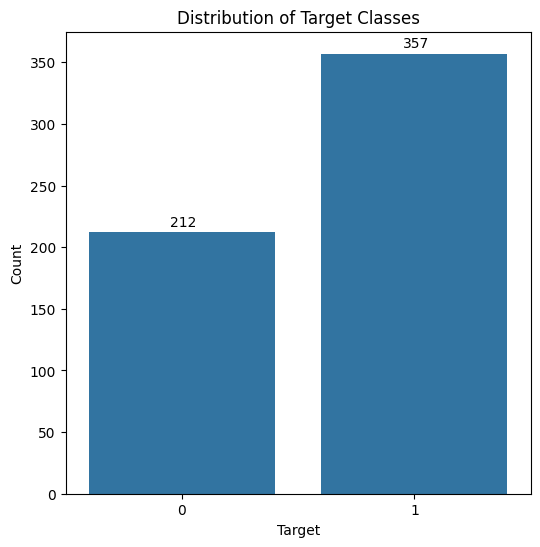

In [20]:
# Visualize the distribution of target classes:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['target'])
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')

for i in range(len(df['target'].value_counts())):
    plt.text(i-.05, df['target'].value_counts()[i]+5, df['target'].value_counts()[i])

plt.show()

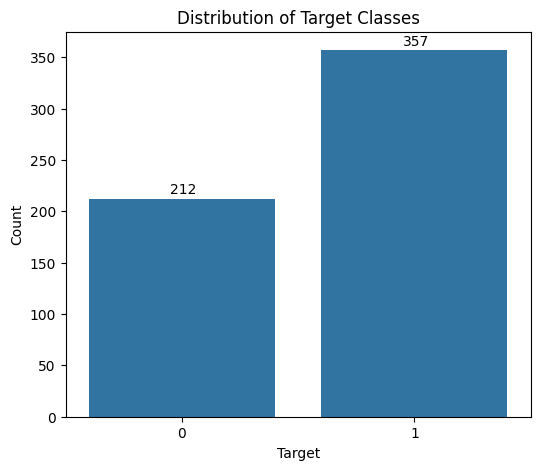

In [21]:
# Visualize the distribution of target classes:
plt.figure(figsize=(6, 5))
sns.barplot(x=df['target'].value_counts().keys(), y=df['target'].value_counts())
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')

for i in range(len(df['target'].value_counts())):
    plt.text(i-.05, df['target'].value_counts()[i]+5, df['target'].value_counts()[i])

plt.show()

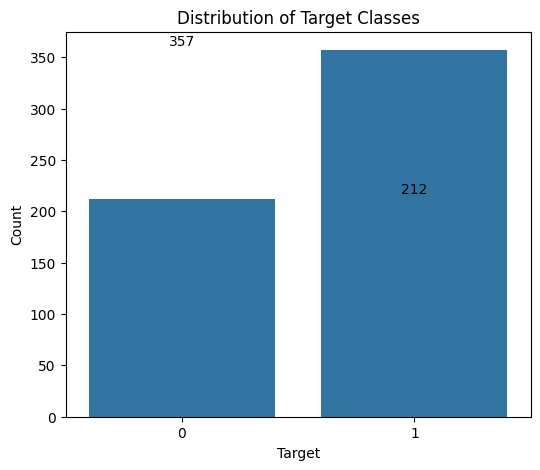

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has a 'target' column
value_counts = df['target'].value_counts().reset_index()
value_counts.columns = ['target', 'count']

plt.figure(figsize=(6, 5))
sns.barplot(data=value_counts, x='target', y='count')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title("Distribution of Target Classes")

for i in range(len(value_counts)):
    plt.text(i, value_counts['count'][i] + 5, str(value_counts['count'][i]), ha='center')

plt.show()

In [23]:
sns.__version__

'0.13.2'

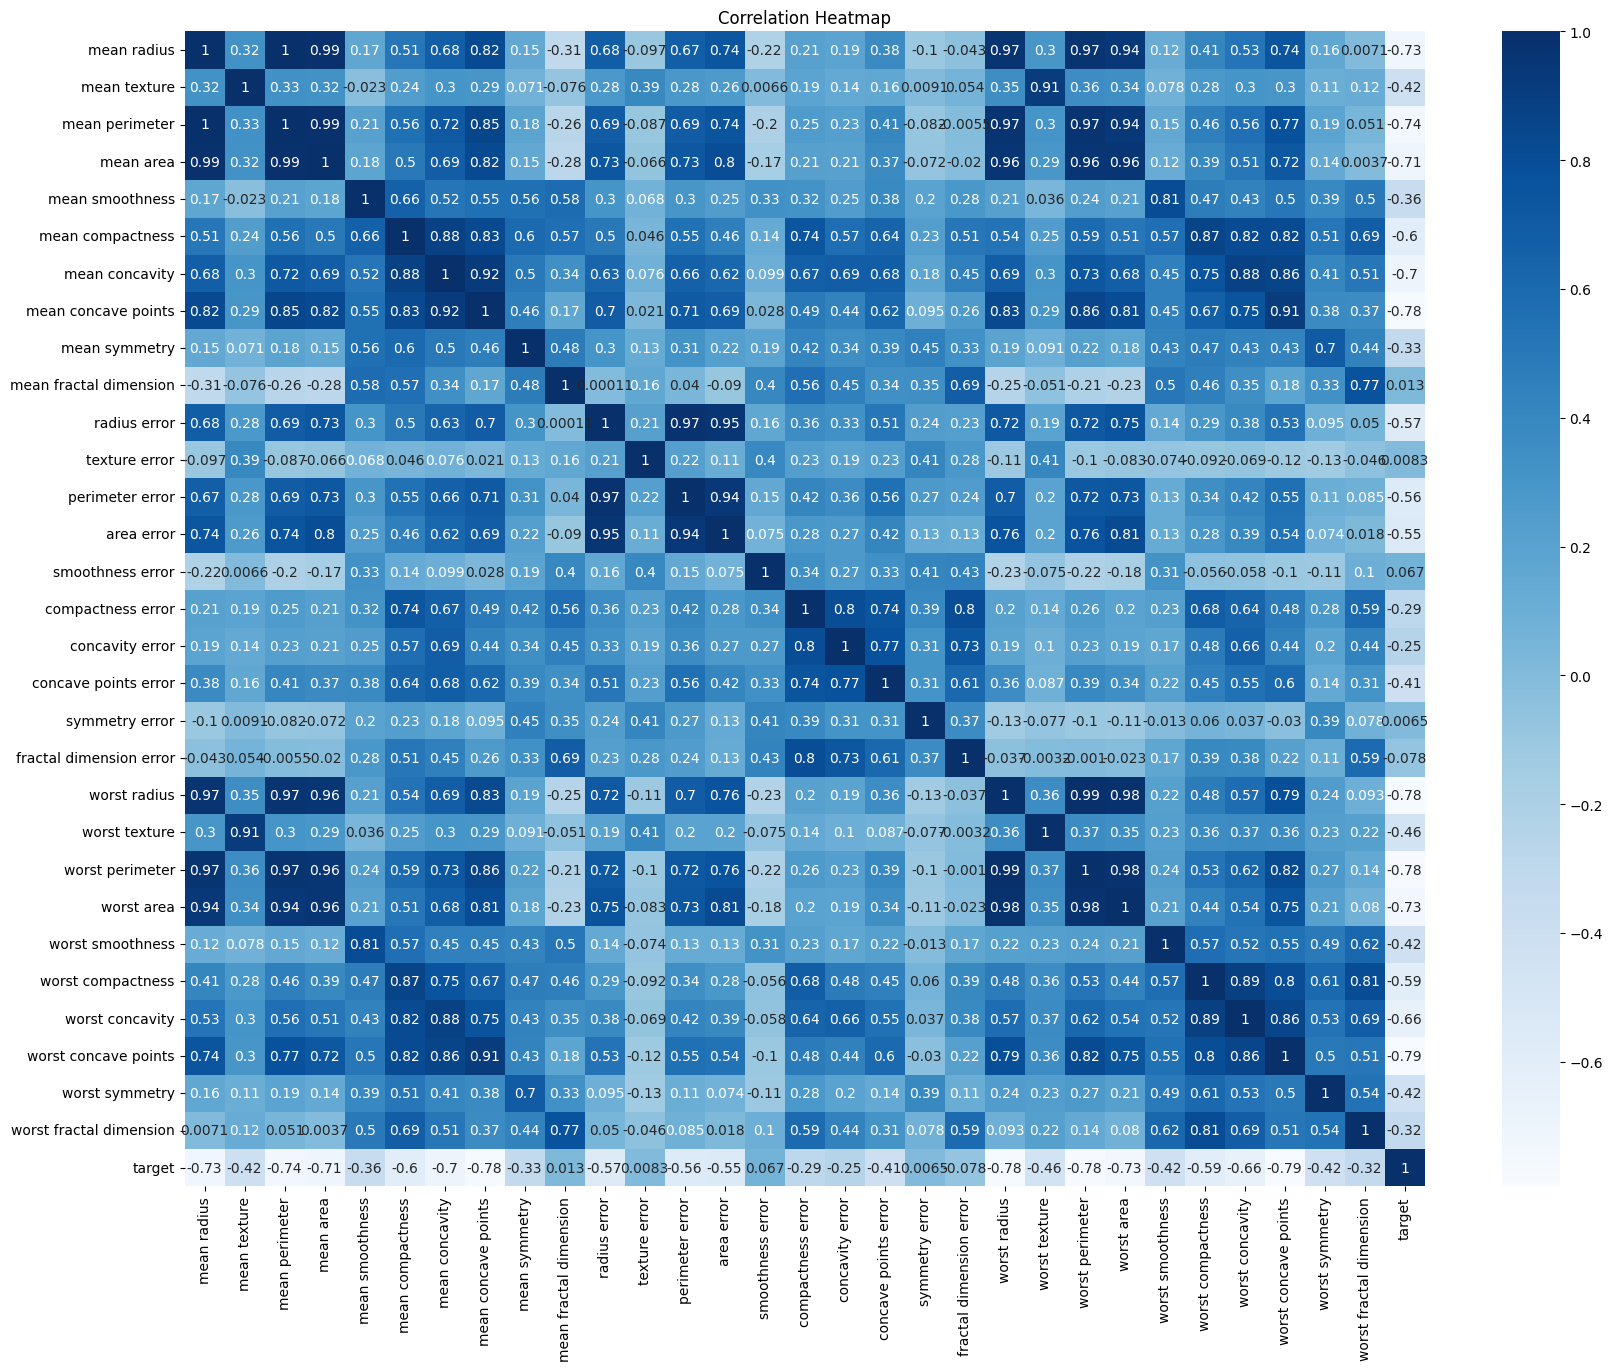

In [24]:
# Visualize a correlation heatmap:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linecolor='Black')
plt.title('Correlation Heatmap')
plt.show()

In [25]:
correlation_matrix

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


## Step 5: Model Training and Evaluation

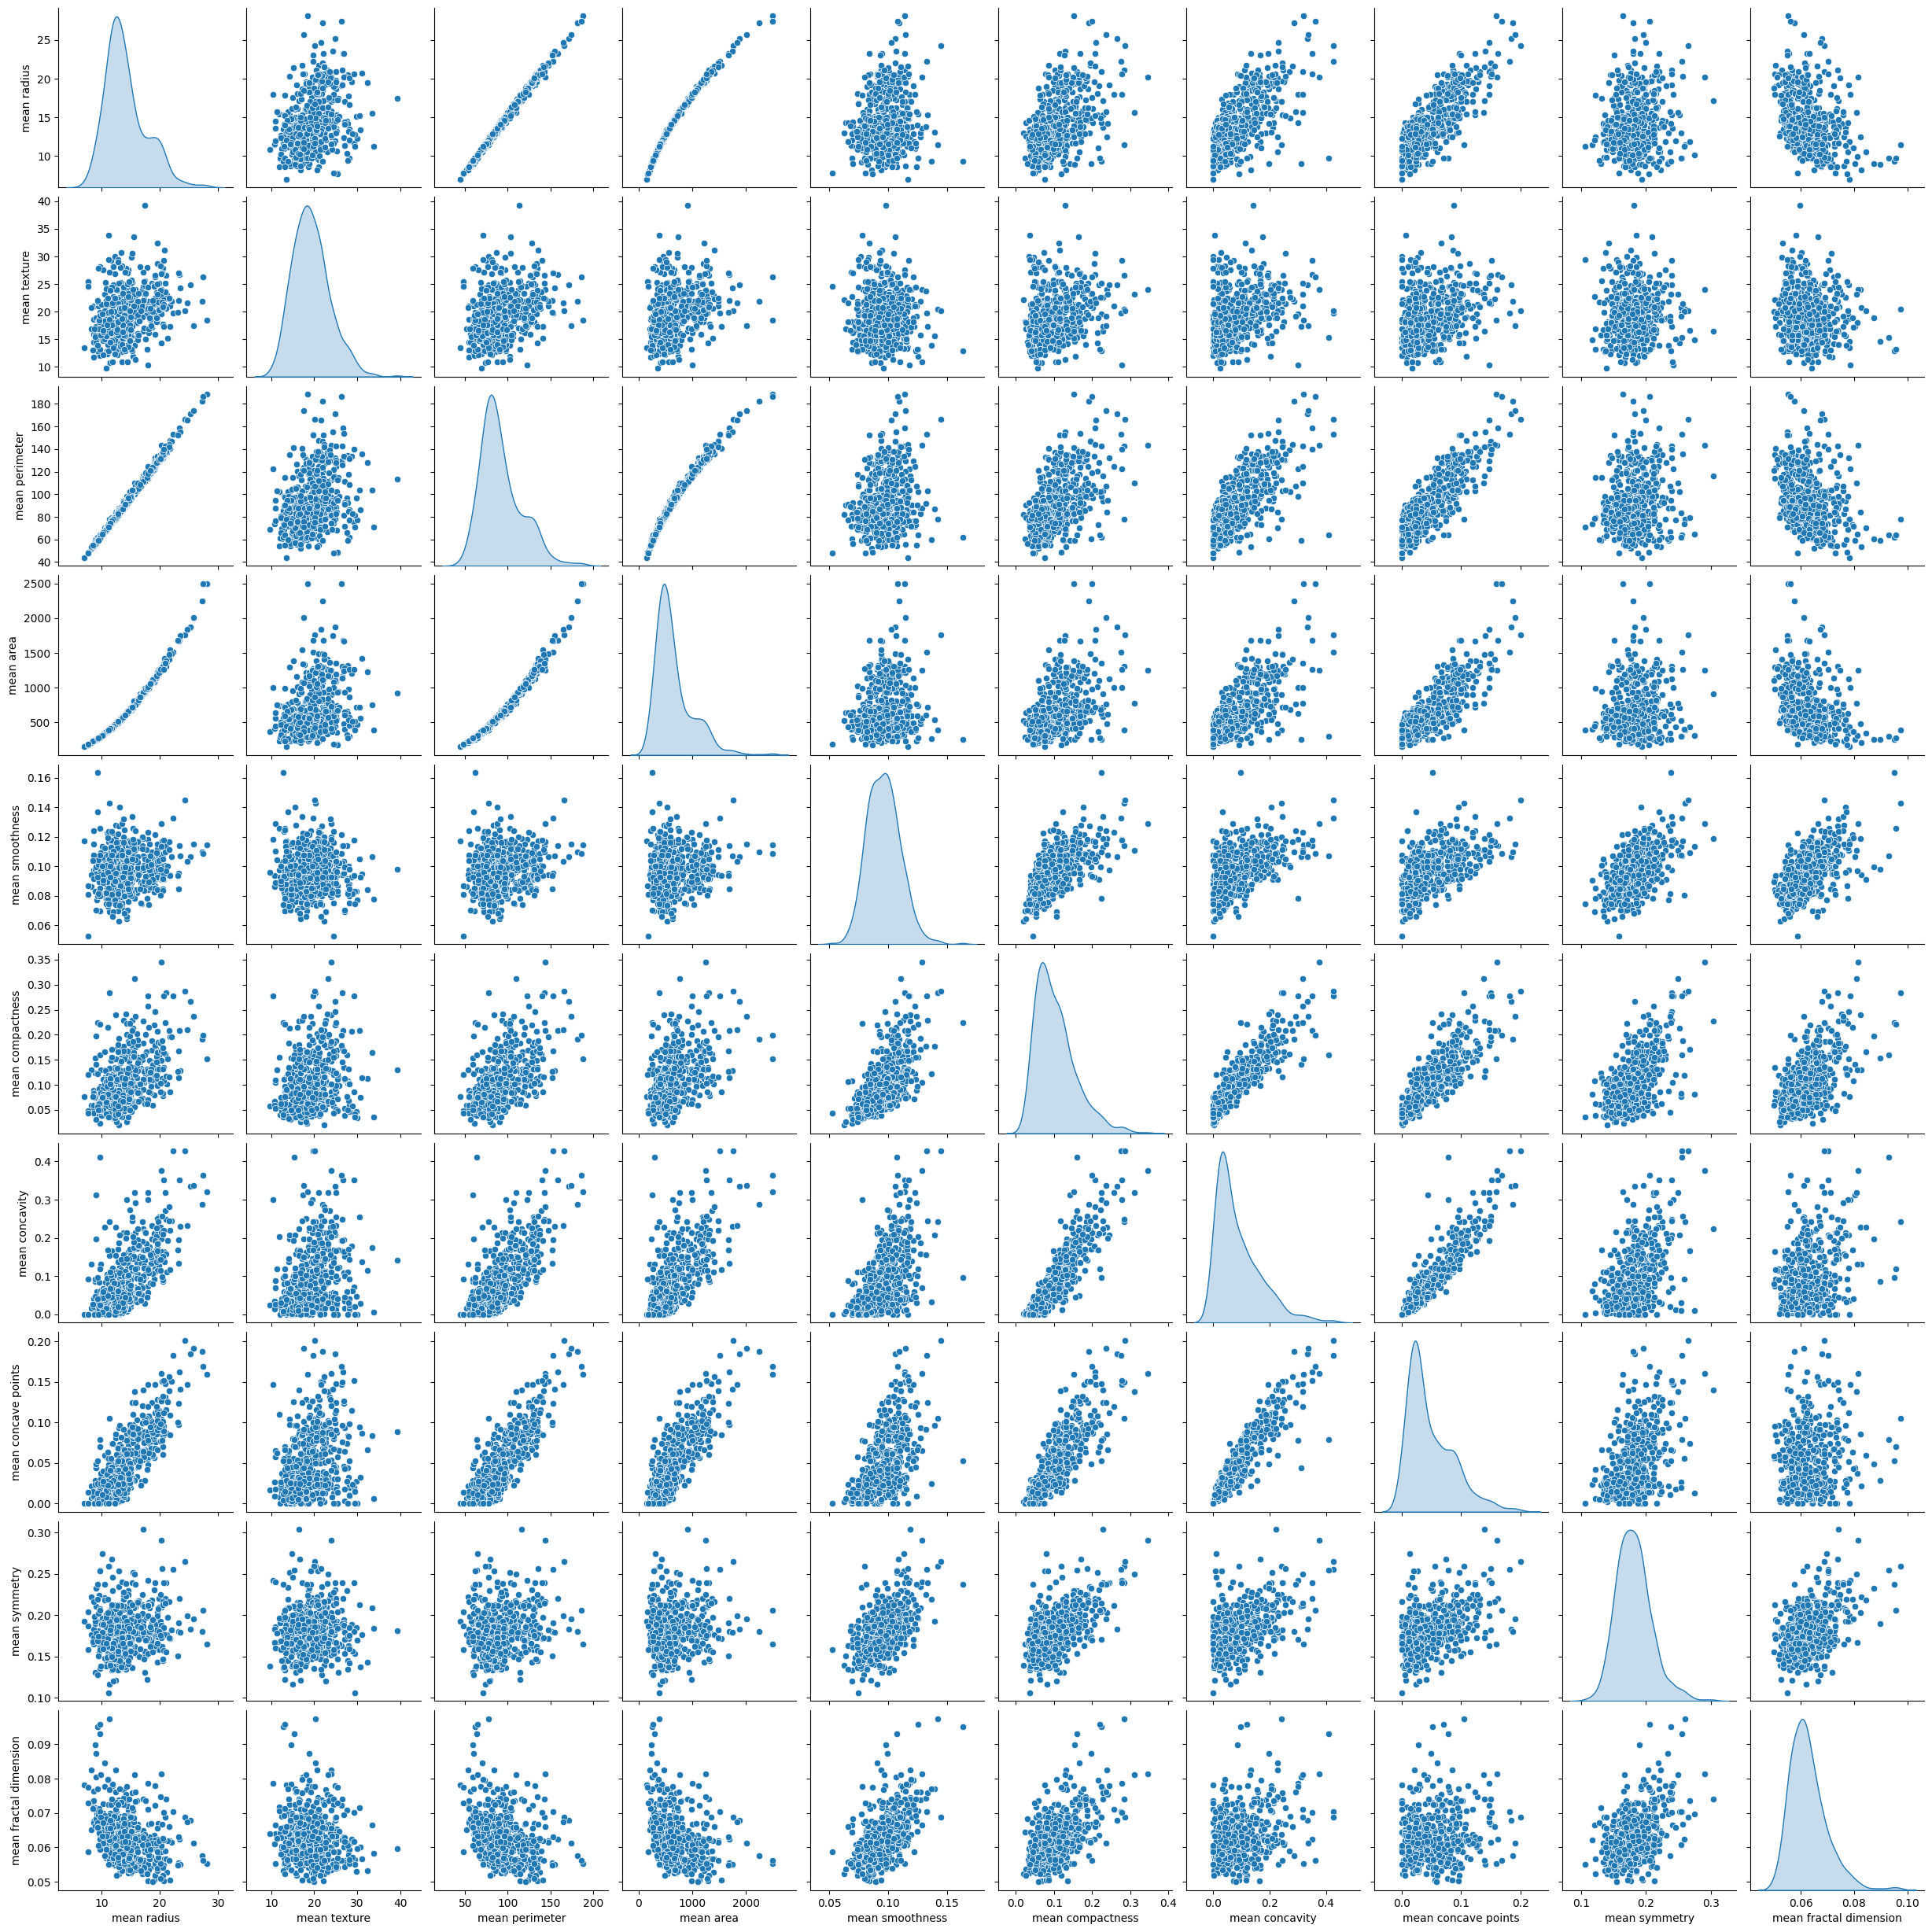

In [26]:
sns.pairplot(df.iloc[:, :10], diag_kind='kde')

In [27]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [28]:
# Make predictions
y_pred = model.predict(X_test)

In [29]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1],
      dtype=int64)

In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [31]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[28  4]
 [ 0 54]]


In [32]:
cm_df = pd.DataFrame(confusion, index=['Actual0', 'Actual1'], columns=['Predict0', 'Predict1'])

<Axes: >

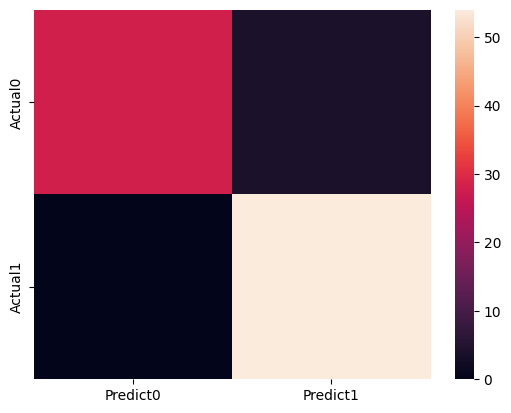

In [33]:
sns.heatmap(cm_df)

In [34]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.93        32
           1       0.93      1.00      0.96        54

    accuracy                           0.95        86
   macro avg       0.97      0.94      0.95        86
weighted avg       0.96      0.95      0.95        86



In [35]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

In [36]:
model.predict_proba(X_test)

array([[9.99999905e-01, 9.45765243e-08],
       [7.44128296e-04, 9.99255872e-01],
       [1.00000000e+00, 3.06860241e-11],
       [9.99980194e-01, 1.98059317e-05],
       [3.81505606e-04, 9.99618494e-01],
       [4.77469794e-01, 5.22530206e-01],
       [9.94797906e-01, 5.20209431e-03],
       [5.65495907e-02, 9.43450409e-01],
       [3.25236625e-03, 9.96747634e-01],
       [4.70940022e-03, 9.95290600e-01],
       [1.92843562e-03, 9.98071564e-01],
       [1.72072753e-05, 9.99982793e-01],
       [9.98256241e-01, 1.74375919e-03],
       [9.99999962e-01, 3.81827585e-08],
       [9.99834791e-01, 1.65209010e-04],
       [3.41545260e-04, 9.99658455e-01],
       [2.22516795e-05, 9.99977748e-01],
       [5.90542954e-02, 9.40945705e-01],
       [9.76028125e-01, 2.39718752e-02],
       [3.03432389e-06, 9.99996966e-01],
       [1.26409175e-02, 9.87359082e-01],
       [7.89531637e-01, 2.10468363e-01],
       [1.34113410e-02, 9.86588659e-01],
       [9.33778317e-06, 9.99990662e-01],
       [1.170560

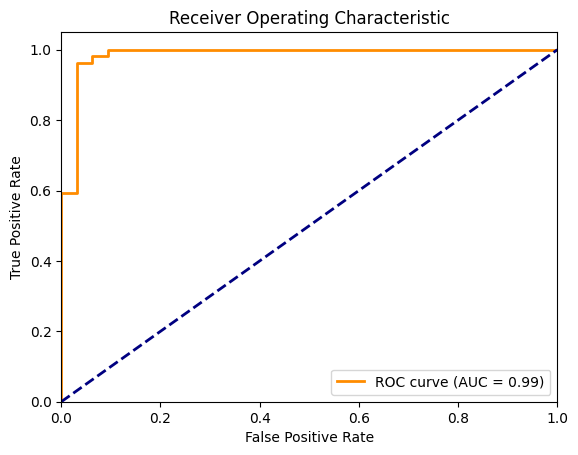

In [37]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [38]:
from sklearn.metrics import accuracy_score

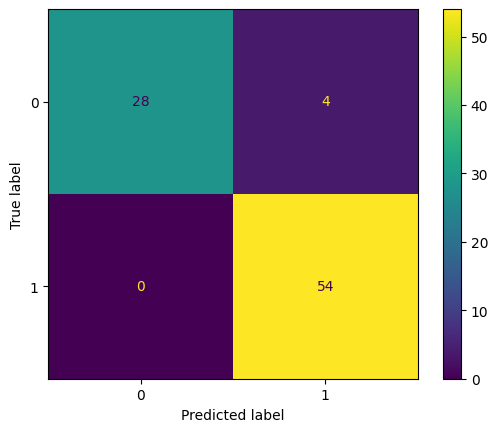

In [39]:
dis = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion)
dis.plot()